# Stochastics
### RANDOM NUMBERS
### SIMULATION
### VALUATION
### RISK MEASURES

In [1]:
import math
import numpy as np
import numpy.random as npr
from pylab import plt, mpl
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline
npr.seed(100)
np.set_printoptions(precision=4)

In [2]:
npr.rand(10) # 10 random numbers in [0, 1]

array([0.5434, 0.2784, 0.4245, 0.8448, 0.0047, 0.1216, 0.6707, 0.8259,
       0.1367, 0.5751])

In [3]:
npr.rand(5, 5) # 25 random numbers in shape [5, 5]

array([[0.8913, 0.2092, 0.1853, 0.1084, 0.2197],
       [0.9786, 0.8117, 0.1719, 0.8162, 0.2741],
       [0.4317, 0.94  , 0.8176, 0.3361, 0.1754],
       [0.3728, 0.0057, 0.2524, 0.7957, 0.0153],
       [0.5988, 0.6038, 0.1051, 0.3819, 0.0365]])

In [4]:
''' 
Seeding random numbers in a range with broadcasting
'''
a = 5.
b = 10.
npr.rand(10) * (b - a) + a
npr.rand(5, 5) * (b - a) + a # Also works in 2 dimension case

array([[7.7234, 8.8456, 6.2535, 6.4295, 9.262 ],
       [9.875 , 9.4243, 6.7975, 7.9943, 6.774 ],
       [6.701 , 5.8904, 6.1885, 5.2243, 7.5272],
       [6.8813, 7.964 , 8.1497, 5.713 , 9.6692],
       [9.7319, 8.0115, 6.9388, 6.8159, 6.0217]])

# Random API
* `rand(n, m, q…)` random numbers in ${[0, 1}$ in specified shape of `**args`
* `randn(n, m, q...)` as above but drawn from standard normal distrbution in ${[0, 1]}$
* `randint(low, high, size)` random integer from low inclusive to high exclusive
* `choice(a, size, replace, p)` is `size` draws from array `a` with or without replacement (`replace`). `p` is an optional array of length `a` giving probabilities to the choices - otherwise a uniform distribution is assumed

(array([ 2.,  1.,  0.,  2.,  1.,  6.,  6., 11.,  8.,  7.,  5.,  5.,  4.,
         9.,  8., 10.,  1.,  4.,  6.,  2.,  0.,  0.,  0.,  1.,  1.]),
 array([-2.2669, -2.0732, -1.8796, -1.6859, -1.4923, -1.2986, -1.105 ,
        -0.9113, -0.7177, -0.524 , -0.3304, -0.1367,  0.0569,  0.2506,
         0.4442,  0.6379,  0.8315,  1.0252,  1.2188,  1.4125,  1.6061,
         1.7998,  1.9934,  2.1871,  2.3807,  2.5744]),
 <a list of 25 Patch objects>)

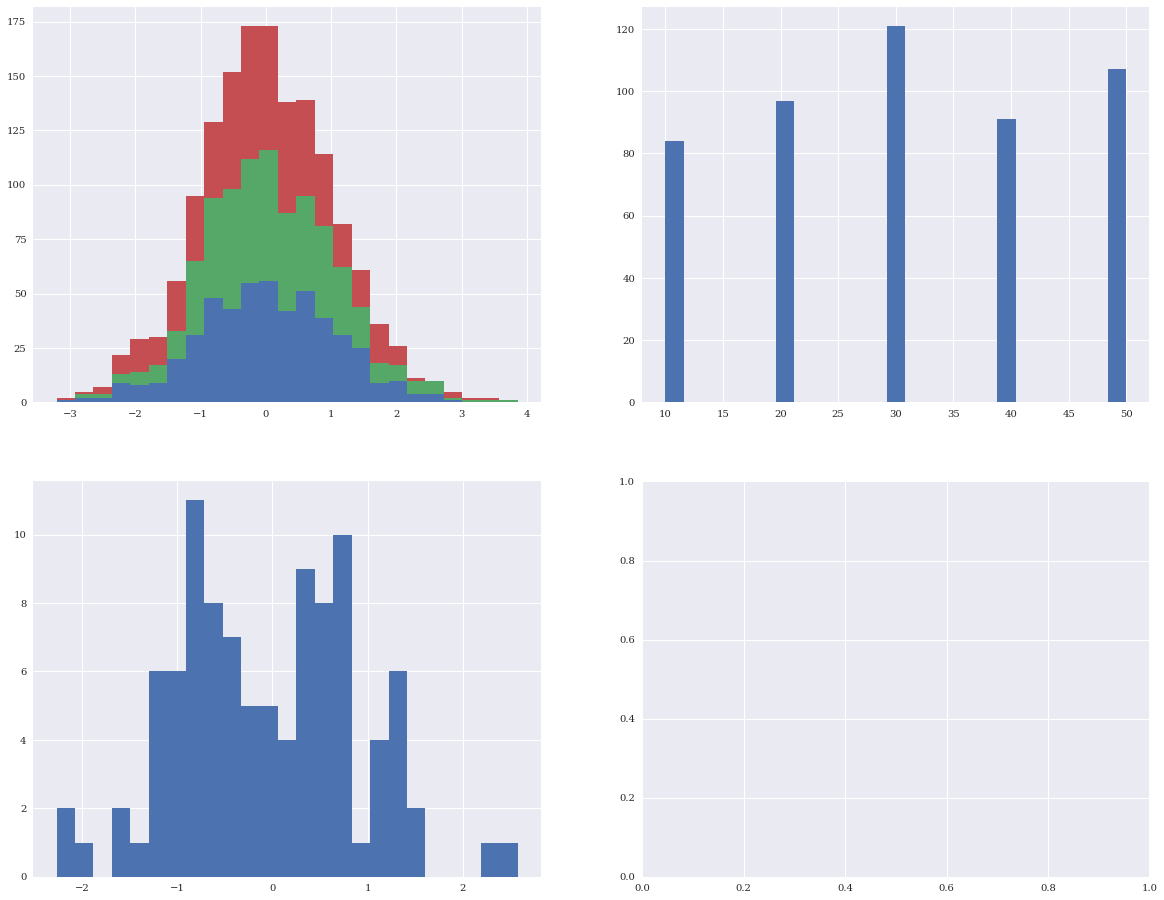

In [5]:
sample_size = 500
rn1 = npr.randn(sample_size, 3) # i.e. 500 rows, 3 columns
a = [ 10, 20, 30, 40, 50]
a_no_replace = npr.randn(sample_size)
rn2 = npr.choice(a, size=sample_size)
''' Kind of a dumb example, but the below is creating a population and sampling from it without replacement'''
rn3 = npr.choice(a_no_replace, size=100, replace=False)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,
                                                     figsize=(20, 16))

ax1.hist(rn1, bins=25, stacked=True)
ax2.hist(rn2, bins=25)
ax3.hist(rn3, bins=25)

# Distributions Used in Finance
* The most commonly used distributions in finace are the normal and log-normal
* This is because they can easily be discretized and even most models that don't rest on these distributions can be easily discretized using them

(array([ 20.,  45.,  67., 186.,  74.,  47.,  56.,   3.,   0.,   2.]),
 array([ 0. ,  1.3,  2.6,  3.9,  5.2,  6.5,  7.8,  9.1, 10.4, 11.7, 13. ]),
 <a list of 10 Patch objects>)

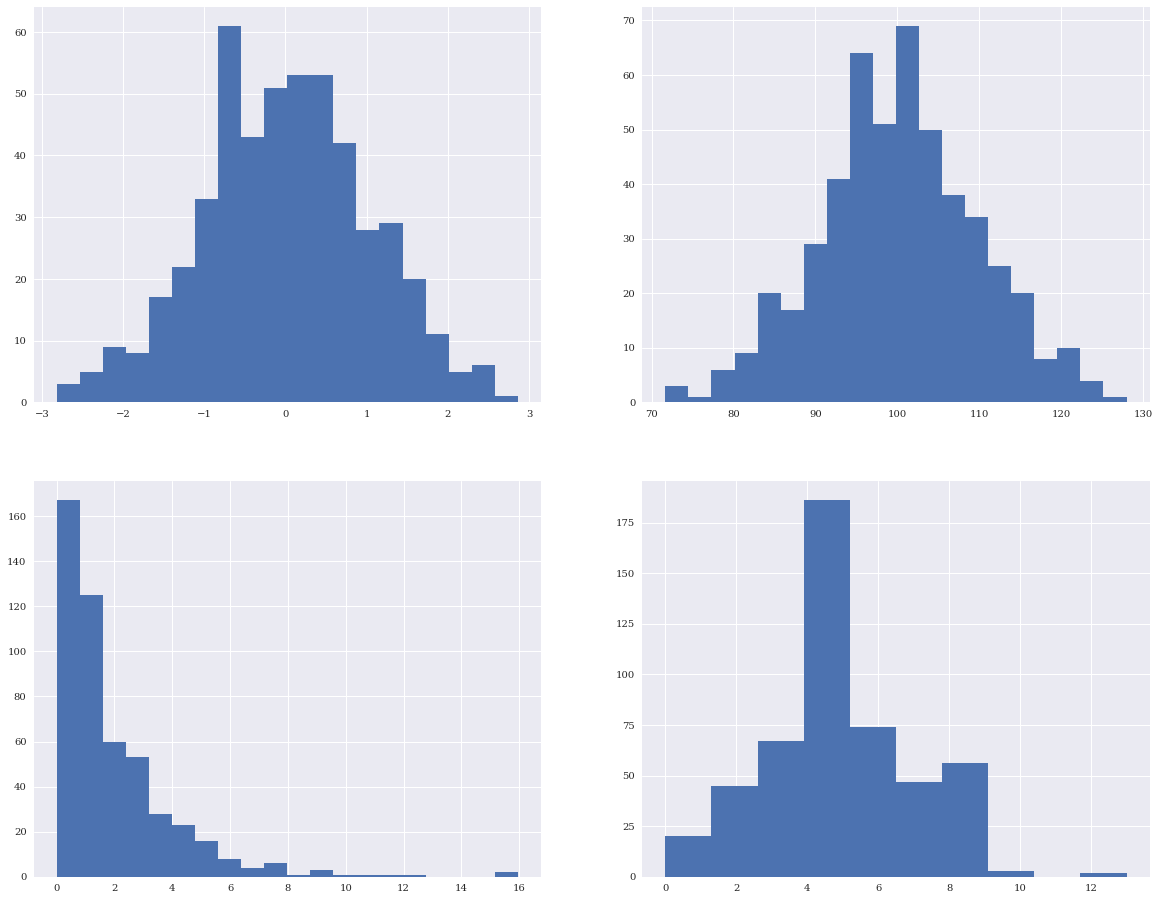

In [6]:
sample_size = 500
rn1 = npr.standard_normal(sample_size) # mean 0, standard deviation 1
rn2 = npr.normal(100, 10, sample_size) # mean 100, standard deviation 10
rn3 = npr.chisquare(df=2, size=sample_size)
rn4 = npr.poisson(lam=5.0, size=sample_size)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(20, 16))
ax1.hist(rn1, bins=20)
ax2.hist(rn2, bins=20)
ax3.hist(rn3, bins=20)
ax4.hist(rn4)

# Simulation
* Monte Carlo simulation is the most used simulation method in finance, because it adapts to a wide variety of models, though at a high computational cost
* To start, consider Black-Scholes-Merton setup for option pricing in form ${S_{T} = S_{0} \exp((r - 1/2 \sigma^2)T + \sigma \sqrt{T} z}$
* Intuitively: Multiply the starting price by the exponential of the risk free rate, subtract half the security volatility squared, multiply by time, and add the product of the volatility, square root of Time unit and a random normal variable
* Note that the exponential function makes the risk-free volatility measure log-normal
* Note the differential nature of the equation due to sigma and time (expiry) both varying in real applications
* A higher risk free rate shifts the security price at end time higher
* okay

Text(0, 0.5, 'Frequency')

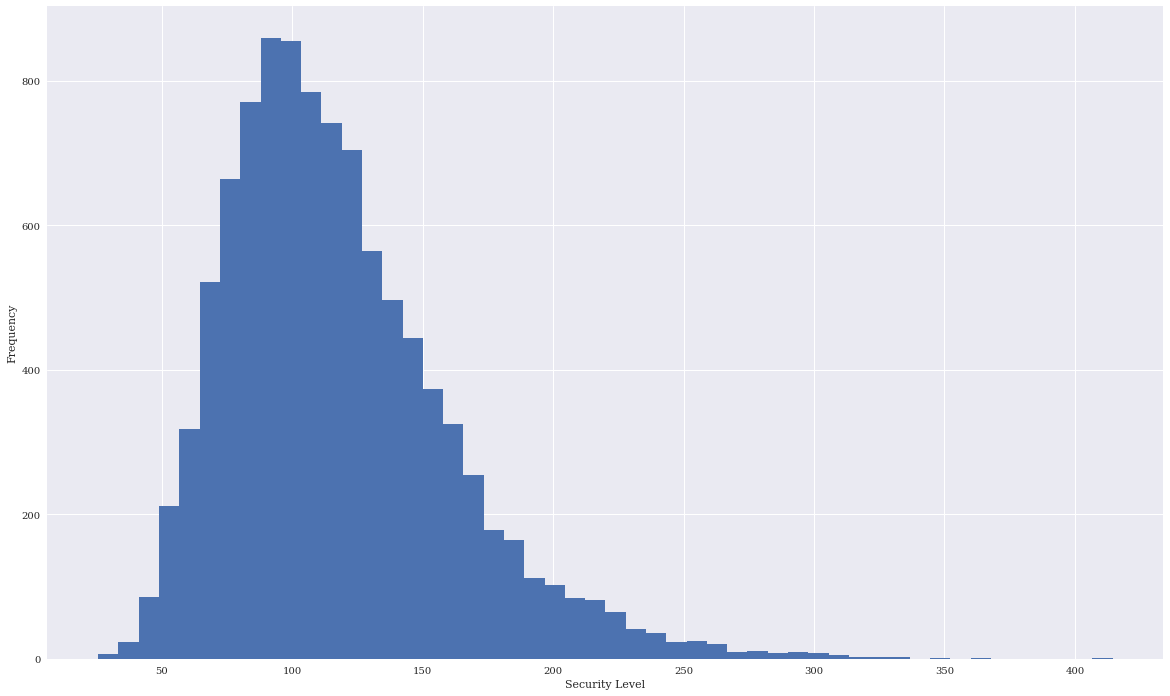

In [7]:
def analytic_black_scholes(start, vol, time, r, trials):
    return start * np.exp((r - 0.05 * vol ** 2) * time + vol * math.sqrt(time) * npr.standard_normal(trials))
monte_carlo_black_scholes = analytic_black_scholes(100, 0.25, 2, 0.05, 10000)

plt.figure(figsize=(20,12))
plt.hist(monte_carlo_black_scholes, bins=50)
plt.xlabel('Security Level')
plt.ylabel('Frequency')

# Stochastic Processes
* Generally in the form ${dX_{t} = \mu(X, t)dt + \sigma(X_{t}, t)dB_{t}}$ where B is a Brownian motion and ${\mu}$ is a function representing idiosyncratic features of the problem at hand (like the risk-free rate)
* The Black-Scholes-Merton continuous time SDE for index level is: ${dS_{t} = rS_{t}dt + \sigma S_{t} d Z_{t}}$
* The analytic form of this (via Euler method is) ${S_{t} = S_{t - \Delta t} exp((r - 1/2 \sigma^2) \Delta t + \sigma \sqrt{\Delta t} z_{t}}$ where ${z_{t}}$ is a random standard normal variable

In [8]:
def dynamic_bsm_security_simultation(trials, time, del_partitions, S0, vol, r):
    dt = T / del_partitions # delta grid
    S = np.zeros((del_partitions + 1, I)) # I trails over dt interals
    S[0] = S0
    for t in range(1, del_partitions + 1):
        S[t] = S[t - 1] * np.exp((r - 0.5 * vol ** 2) * dt +
                 vol * math.sqrt(dt) * npr.standard_normal(I))
    return S

In [9]:
R = math.sqrt(0.02) * npr.standard_normal(10000)
len(R)

10000

In [10]:
S = dynamic_bsm_security_simultation(trials=10000, time=1, del_partitions=50, S0=100, vol=0.15, r=0.05)
plt.figure(figsize=(20, 12))
plt.hist(S[-1], bins=50) # Final value of each simulation

NameError: name 'T' is not defined

In [12]:
# Printing out some complete realizations
plt.figure(figsize=(20,12))
plt.plot(S[:,:20], lw=1.5) # Plot all realizations for first 20
plt.xlabel('time')
plt.ylabel('security level')

NameError: name 'S' is not defined

<Figure size 1440x864 with 0 Axes>

* Note that the above also functions as a payoff graph for American & Bermudan options that have an optimal stopping component

# Square-Root Diffusion
* A second class of stochastic financial processes are mean-reverting processes. Used for modeling short rates, volatility processes, stat arb
* As always, the Stochastic Differential Equation: ${dx_{t} = \kappa(\theta - X_{t})dt + \sigma \sqrt{x_{t}} Z_{t}}$ with ${\kappa}$ as mean reversion factor, ${\theta}$ as long-term mean, ${Z_{t}}$ as a Brownian motion
* ${x_{t}}$ values are Chi-square distributed
* The Euler method is exact for Geometric Brownian Motion, but biased for other stochastic processes
* For computational reasons, **even if an exact non-Euler discretization is present, the Euler-discretization is often preferable.**
* Definitions for Square-Root Diffusion Euler are ${s = t - \Delta t}$ (remainder after subtracting infinitesmal) and ${x^+ \equiv max(x, 0)}$ (strictly positive values), referred to as **full truncation**
* This discretization is: ${\tilde{x_{t}} = \tilde{x_{s}} + \kappa(\theta - \tilde{x_{s}}^+) \Delta t + \sigma \sqrt{\tilde{x_{s}}^+} \sqrt{\Delta t} Z_{t}}$ and ${x_{t} = \tilde{x_{t}^+}}$

* Intutiively - ${\tilde{x_{s}}}$ here is value from previous step, ${\tilde{x_{s}}^+}$ is same thing but bounded at 0 (value of an option cannot be negative), mean reversion occurs by subtracting the long-term mean from the previous step and returning it towards the mean b the mean reversion factor (Kappa) - then adding in a volatility adjusted Brownian process step multiplied by the square root of the previous step.

In [13]:
# Square-Root Diffusion Implementation
T = 1
x0 = 0.05 # Initial value (here a T-bill rate)
kappa = 3.0 # Mean Reversion coefficient
theta = 0.02 # Long-term mean
sigma = 0.07 # Vol of course
I = 10000 # Monte trials
partitions = 50 # for generating PDE mesh

def square_root_diffusion(trials, time, x0, kappa, theta, sigma, partitions):
    dt = time / partitions
    xh = np.zeros((partitions+1, I)) # I trials of partioned steps steps
    x = np.zeros_like(xh)
    xh[0] = x0
    x[0] = x0
    for t in range(1, partitions+1):
        xh[t] = (xh[t-1] + kappa * 
                 (theta - np.maximum(xh[t-1], 0)) * dt
                 + sigma * np.sqrt(np.maximum(xh[t-1], 0))
                 * np.sqrt(dt) * npr.standard_normal(I)) # standard_normal call monte carlos it
                 
    x = np.maximum(xh, 0)
    return x

Text(0, 0.5, 'Frequency')

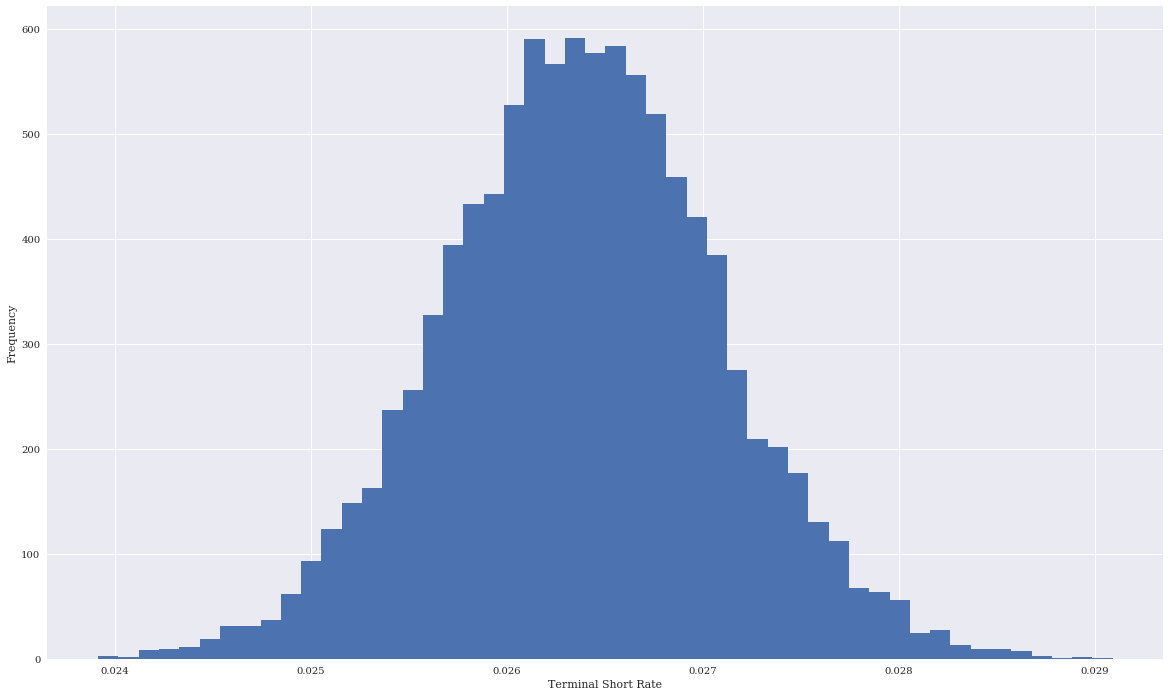

In [14]:
x1 = square_root_diffusion(10000, 1, 0.05, 3.0, 0.02, 0.01, 50) # Returns a list of trials realizations of a diffusion
plt.figure(figsize=(20,12))
plt.hist(x1[25], bins=50)
plt.xlabel('Terminal Short Rate')
plt.ylabel('Frequency')

Text(0, 0.5, 'Short Rate')

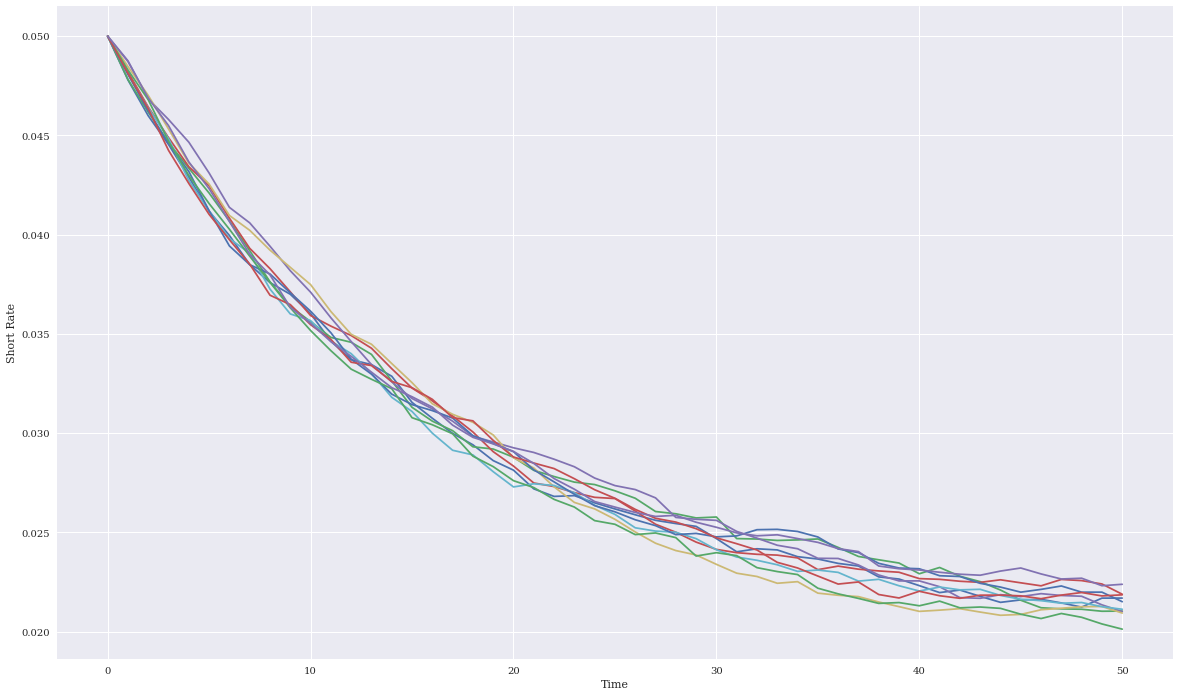

In [15]:
plt.figure(figsize=(20, 12))
plt.plot(x1[:, :10])
plt.xlabel('Time')
plt.ylabel('Short Rate')

# Stochastic Volatility
* Non constant volatility was introduced by the Heston model:
    * ${d S_{t} = r S_{t} dt + \sqrt{v_{t}} d Z_{t}^1}$
    * ${dv_{t} = \kappa_{v} (\theta_{v} - v_{t}) dt + \sigma \sqrt(v_{t}) d Z_{t}^2}$
    * ${ d Z_{t}^1 * d Z_{t}^2 = \rho}$
* where ${\rho}$ is the correlation between the two Brownian motions - this is used in the form of its Cholesky decomposition `TODO: Understand Why`
* Intuitively: rembember that **two separate stochastic processes are running simultaneously**. The volatility influences the output of the main price process and the volatility process is influenced by the ${rho}$ correlation of the price process - e.g. volatility increases with declining prices

In [16]:
def cholesky_rho(rho):
    corr_mat = np.zeros((2,2))
    corr_mat[0, :] = [1.0, rho]
    corr_mat[1, :] = [rho, 1.0]
    cho_mat = np.linalg.cholesky(corr_mat)
    return cho_mat

In [17]:
cho_mat = cholesky_rho(0.6)
cho_mat

array([[1. , 0. ],
       [0.6, 0.8]])

In [18]:
def stochastic_volatility_process(trials, time, v0, kappa, theta, sigma, partitions, random_mesh, cho_mat):
    dt = time/partitions
    v = np.zeros_like(random_mesh[0])
    vh = np.zeros_like(v)
    # Initialize
    v[0] = v0
    vh[0] = v0
    for t in range(1, partitions + 1):
        ran = np.dot(cho_mat, random_mesh[:, t, :]) # Influence the random number by the correlation
        vh[t] = (vh[t - 1] 
                 + kappa * (theta - np.maximum(vh[t-1], 0)) * dt
                 + sigma * np.sqrt(np.maximum(vh[t-1], 0)) *
                 math.sqrt(dt) * ran[1])
    v = np.maximum(vh, 0)
    return v

In [19]:
def stochastic_index_process(trials, time, S0, r, partitions, vol_series, random_mesh):
        S = np.zeros_like(random_mesh[0])
        dt = time/partitions
        # Surface Set Up
        S[0] = S0
        for t in range(1, partitions + 1):
            ran = np.dot(cho_mat, random_mesh[:, t, :]) # Influence the random number by the correlation
            S[t] = S[t-1] * np.exp((r - 0.5 * vol_series[t]) * dt
            + np.sqrt(vol_series[t]) * ran[0] * np.sqrt(dt))
        return S

In [20]:
random_mesh = npr.standard_normal((2, partitions + 1, I)) # 2 processes of the same partition and trial length
vol_process = stochastic_volatility_process(trials=10000, time=1, v0=0.1,
                                            kappa=3.0, theta=0.9, sigma=0.5, partitions=50, random_mesh=random_mesh,
                                            cho_mat=cholesky_rho(0.6))

In [21]:
stochastic_security = stochastic_index_process(trials=10000, time=1, S0=100, r=0.05, 
                                               partitions=50, vol_series=vol_process, random_mesh=random_mesh) 

Text(0.5, 1.0, 'Stochastic Volatility')

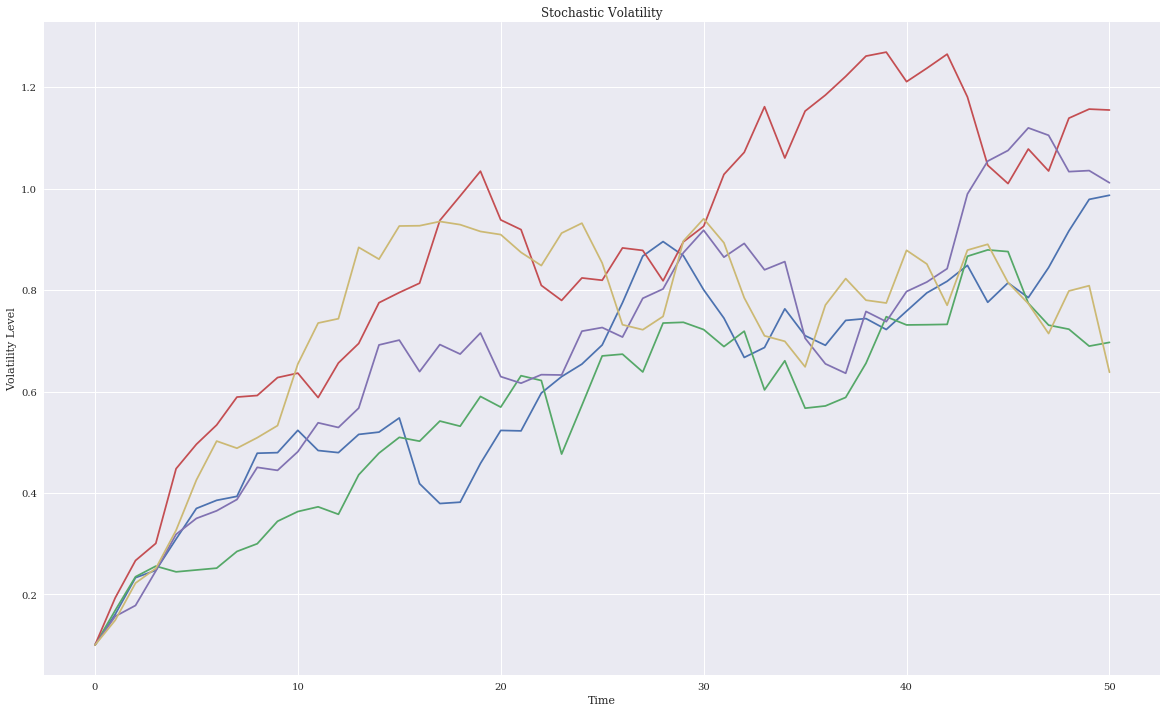

In [22]:
plt.figure(figsize=(20,12))
plt.plot(vol_process[:, :5])
plt.xlabel('Time')
plt.ylabel('Volatility Level')
plt.title('Stochastic Volatility')

Text(0.5, 1.0, 'Brownian Security w/ Stochastic Volatility')

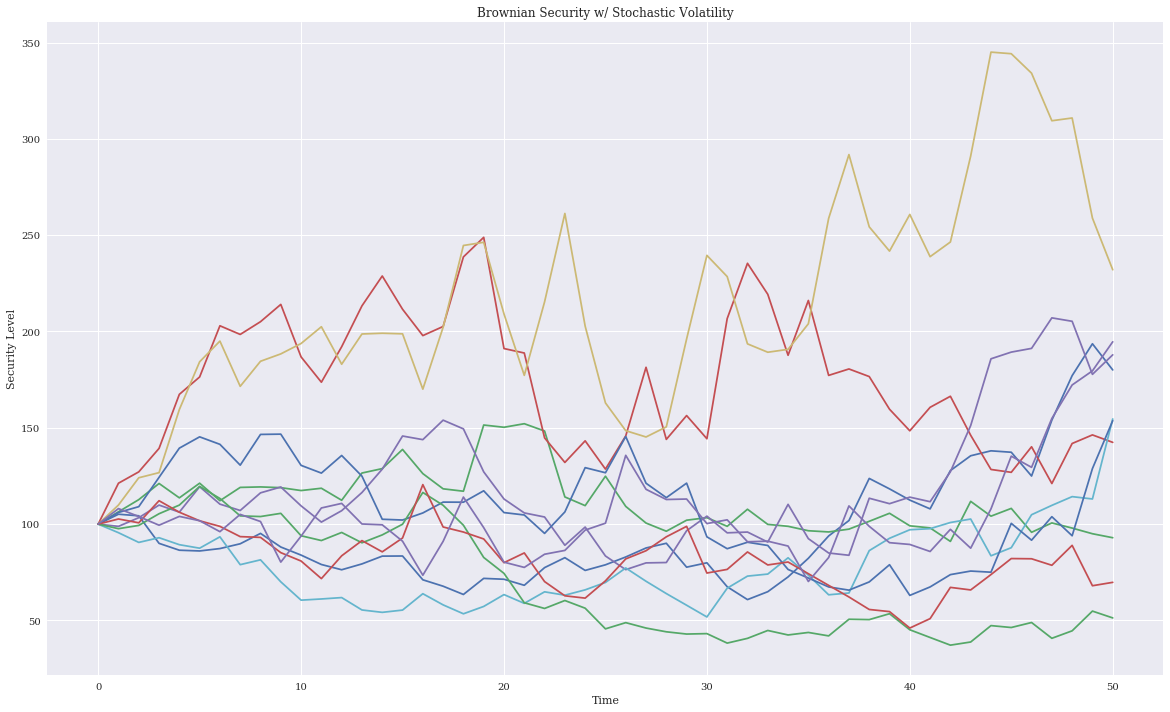

In [23]:
plt.figure(figsize=(20,12))
plt.plot(stochastic_security[:, :10])
plt.xlabel('Time')
plt.ylabel('Security Level')
plt.title('Brownian Security w/ Stochastic Volatility')

NameError: name 'S' is not defined

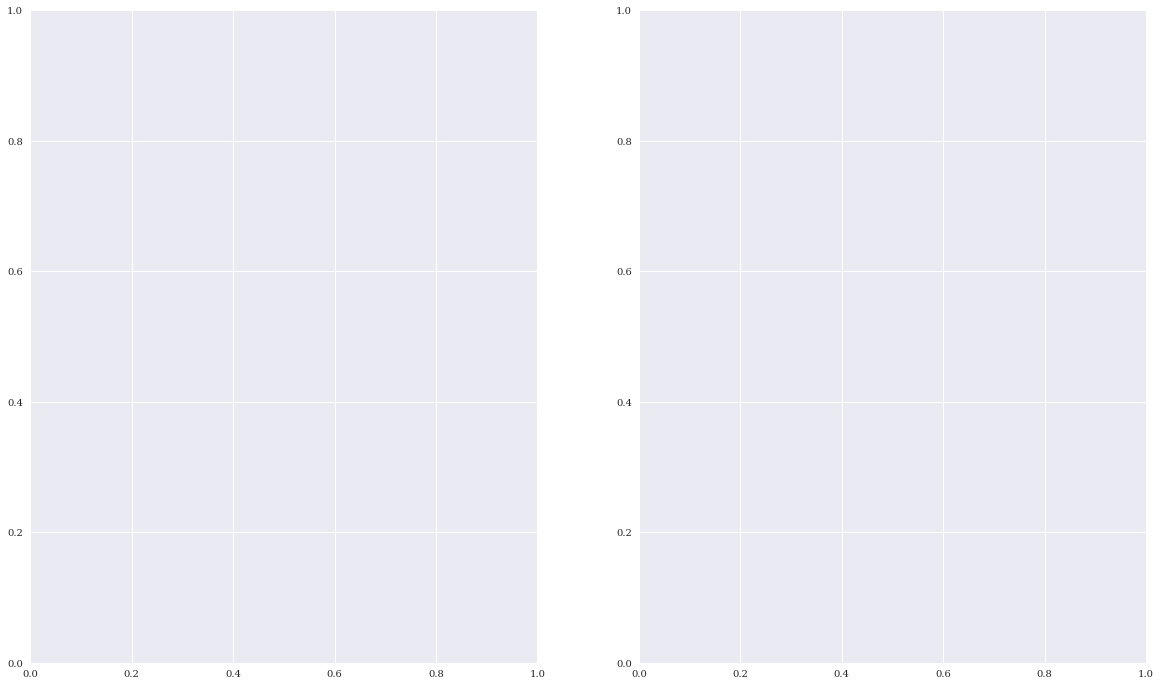

In [24]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,12))
ax1.hist(S[-1], bins=50)
ax1.set_xlabel('Index Level')
ax1.set_ylabel('Frequency')
ax2.hist(vol_process[-1], bins=50)
ax2.set_xlabel('Volatility Level')
ax2.set_ylabel('Frequency')

# Notes on the Above
* Note that the normal distribution of volatility is another reason to use the Euler discretization of the stochastic processes; since the random process is standard normal as well, there is no easy to way to square this with chi-square based exact discretization

# Jump Diffusion
* Now that we have a stochastic volatility model, we can add in the notion of jumps in a security or volatility process ${J = \{j_{1}, j_{2}, ..., j_{T}\}}$
* As usual, the SDE here is: ${d S_{t} = (r - r_{j}) S_{t} dt + \sigma S_{t} d Z_{t} + J_{t} S_{t} N_{t}}$
* Intutiively, the security price at time t is the sum of the drift-correction adjusted risk-free rate, a volatility-adjusted stochastic process, and a standard normally distributed series of jumps occurring in a Poisson process with intensity ${\lambda}$
* ${S_{t}}$ index level at time t
* ${r_{J} \equiv \lambda * (\exp^{\mu_{J} + \delta^2 / 2} - 1})$
* ${J_{t}}$ is a jump at time t with distribution ${log(1 + J_{t}) \approx N(log(1 + \mu_{j}) - \delta^2 / 2, \delta^2)}$ with ${N}$ as the CDF of standard normal random value.
* ${N_{t}}$ a Poisson process with intensithy ${\lambda}$

# Jump Diffusion Discretization
* Given standard normal variables ${z_{t}^n}$ for the Brownian motions and ${y_{t}}$ variables drawn from the Poisson with intensity ${\lambda}$
* ${S_{t} = S_{t - \Delta t} (\exp^{(r - r_{J} - \sigma^2/2) \Delta t + \sigma \sqrt{\Delta t} z_{t}^1} + (\exp^{\mu_{J} + \delta z_{t}^2} -1) y_{t})}$
* Intuitivey, an iteration that evolves the prices by multiplying the previous step by the exponential function of the product of the jump adjusted risk-neutral rate minus the volatility squared divided by two time the time slice plus the volatility times the square root of the time slice times a standard normal variable plus the exponential function of the process mean times jump volatility times second standard normal variable minus one times a Poisson distributed variable

In [25]:
def jump_diffusion(trials, time, S0, r, sigma, lamb, mu, delta, partitions):
    dt = time/partitions
    jump_risk_free = lamb * (math.exp(mu * 0.5 * delta ** 2 ) - 1)
    sn1 = npr.standard_normal((partitions + 1, trials))
    sn2 = npr.standard_normal((partitions + 1, trials))
    poi = npr.poisson(lamb * dt, (partitions + 1, I)) # Poisson draw in the time slice size
    for t in range(1, partitions+1, 1):
        S[t] = S[t - 1] * (np.exp((r - jump_risk_free - 0.5 * sigma ** 2) * dt + sigma * math.sqrt(dt) * sn1[t]) + 
        (np.exp(mu + delta * sn2[t]) - 1) * poi[t])
        S[t] = np.maximum(S[t], 0)
    return S

In [26]:
jump_test = jump_diffusion(trials=10000, time=1, S0=100, r=0.05, sigma=0.2, 
                           lamb=0.3, mu=0.2, delta=0.25
                           , partitions=50)

NameError: name 'S' is not defined

In [27]:
plt.figure(figsize=(20,12))
plt.hist(S[-1], bins=50)
plt.xlabel('Ending Level')
plt.ylabel('Frequency')

NameError: name 'S' is not defined

<Figure size 1440x864 with 0 Axes>

In [28]:
plt.figure(figsize=(20, 12))
plt.plot(S[:, :30], lw=1.5)

NameError: name 'S' is not defined

<Figure size 1440x864 with 0 Axes>

# Variance Reduction
* Because of the pseudo-random nature of number draws, the stochastic terms of these processes may not actually fit to the central moments of their distributions
* To fix this there are a few tactics. First is **antithetic variates** - this is dead simple - just make the distribution symmetrical by adding the opposite sign of whatever value you draw to the random collection
* A better tactic that also fixes the standard deviation is **moment matching**
* Final cell before valuation is a random number class that is nicely callable

In [29]:
# Anthetic Variates
sn = npr.standard_normal(int(10000/2))
sn = np.concatenate((sn, -sn))
print(sn.mean())
print(sn.std()) # Fixes the mean, but not the standard deviation

-7.105427357601002e-19
1.0053598334284073


In [30]:
# Moment Matching
sn = npr.standard_normal(100000) # Pseudo Random
print(sn.mean()) # not good enough
print(sn.std()) # not good enough
sn_new = (sn - sn.mean()) / sn.std() # Great - centralizes the distribution!
print(sn_new.mean())
print(sn_new.std())

0.004508955738585122
1.0022689067983825
2.4868995751603506e-18
0.9999999999999999


In [31]:
def generate_var_reduced_random(partitions, trials):
    sn = npr.standard_normal((partitions + 1, I))
    return (sn - sn.mean()) / sn.std()

# Valuation - Options
* all assets drift at the riskless short-rate - otherwise arbitrage
* because of this - the value of an option is tied to the single parameter of its volatility
* The payoff of a European option is ${h(S_{T} \equiv max(S_{T} - K, 0)}$
* A stochastic pricer for this risk-neutral expectation is ${C_{0} = e^{-rT} E_{0}^{Q}(h(S_{T}) = e^{-rT} \int_{0}^{\infty} h(s) q(s) ds}$
* Intuitively, the area under the 0-bounded curve of the security times a volatility process discounted to be risk-neutral
* Risk-neutral Monte Carlo estimator is ${\tilde{C_{0}} = e^{-rT} \sum_{1}^{I} h(S_{T}^{i})}$ with ${h(S_{T}^{i})}$ here as a stochastic security process

In [78]:
def european_monte_carlo_valuation(trials, partitions, time, S0, r, sigma, strike, option):
    dt = time / partitions
    S = np.zeros((partitions + 1, trials))
    # Add more here
    S[0] = S0
    random_mesh = generate_var_reduced_random(partitions, trials)
    for t in range(1, partitions+1):
        S[t] = S[T-1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * math.sqrt(dt) * random_mesh[t]) # Run stochastic process
        
    if option =='call':
        hT = np.maximum(S[-1] - strike, 0)
    if option == 'put':
        hT = np.maximum(strike - S[-1], 0)
    C0 = math.exp(-r * T) * np.mean(hT) # Risk neutral mean of trials
    return S, hT, C0
    

In [79]:
euro_security_process, euro_trials, euro_price_mean = european_monte_carlo_valuation(10000, 50, 1.0, 100, r=0.05, sigma=0.1,
                                                         strike=120, option='put')

"\nSome fun distribution stuff here - we only get the right side of the distribution since we're 0 bounded.\nIncreasing volatility monotonically increases the number of 0s and also fattens the tail of the right side\n"

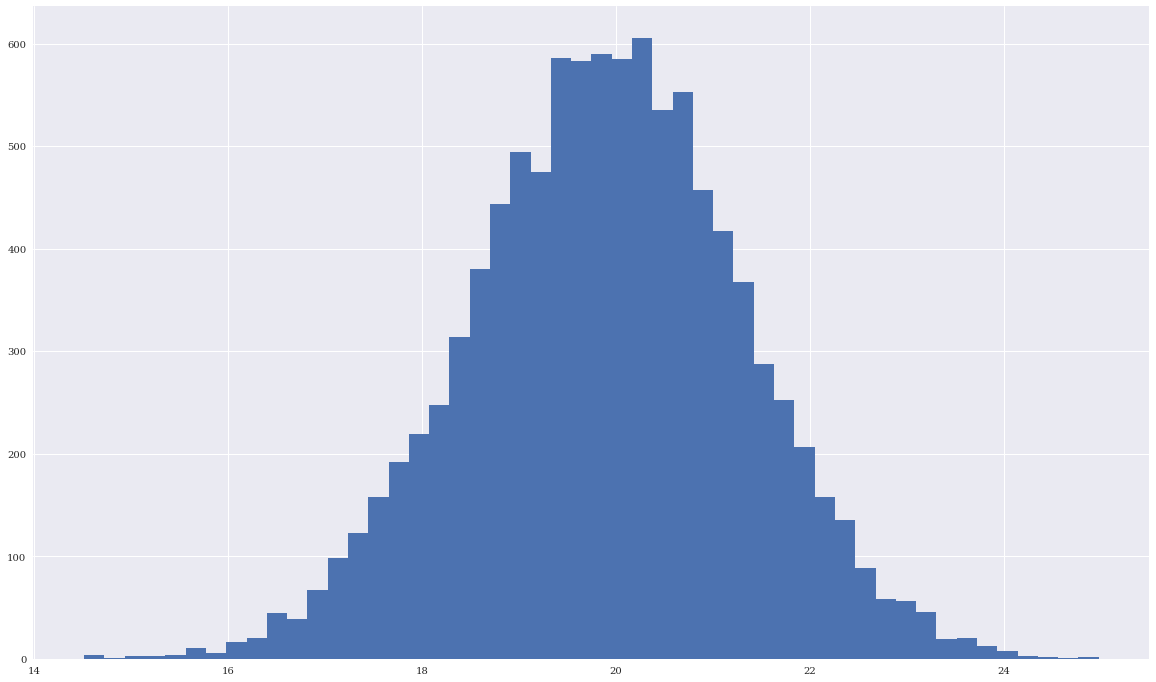

In [80]:
plt.figure(figsize=(20,12))
plt.hist(euro_trials, bins=50)
'''
Some fun distribution stuff here - we only get the right side of the distribution since we're 0 bounded.
Increasing volatility monotonically increases the number of 0s and also fattens the tail of the right side
''' 

Text(0.5, 1.0, 'European Option Evolution Process')

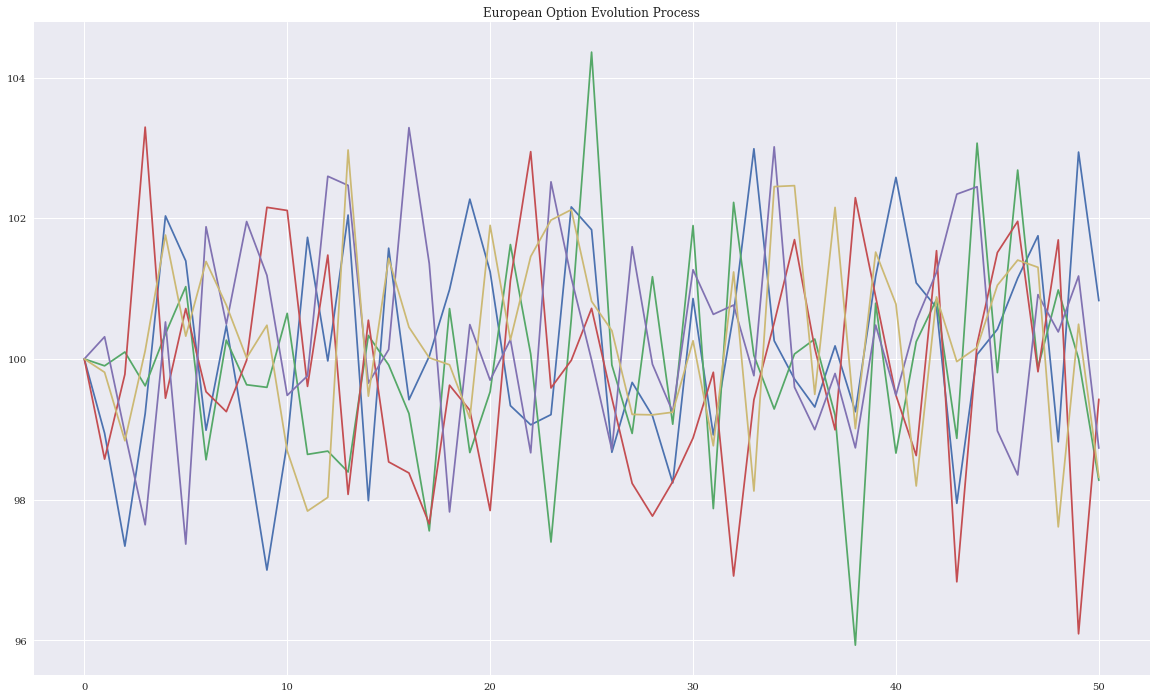

In [81]:
plt.figure(figsize=(20,12))
plt.plot(euro_security_process[:, :5])
plt.title('European Option Evolution Process')

In [82]:
print(euro_price_mean)

18.922335068863948


In [83]:
def generate_european_price_surface(strikes, option):
    price_mean = []
    for K in strikes:
        process, option_trials, mean_strike = european_monte_carlo_valuation(10000, 50, 1.0, 100, r=0.05, sigma=0.1,
                                                         strike=K, option=option)
        price_mean.append(mean_strike)
    return price_mean

In [84]:
strike_list = np.arange(80., 140.1, 5.)
put_surface = generate_european_price_surface(strike_list, 'put')
put_surface = np.array(put_surface)
put_surface

array([0.0000e+00, 0.0000e+00, 0.0000e+00, 4.4686e-06, 4.9404e-01,
       4.6692e+00, 9.4323e+00, 1.4177e+01, 1.8906e+01, 2.3702e+01,
       2.8433e+01, 3.3205e+01, 3.7969e+01])

Text(0.5, 0, 'Strike')

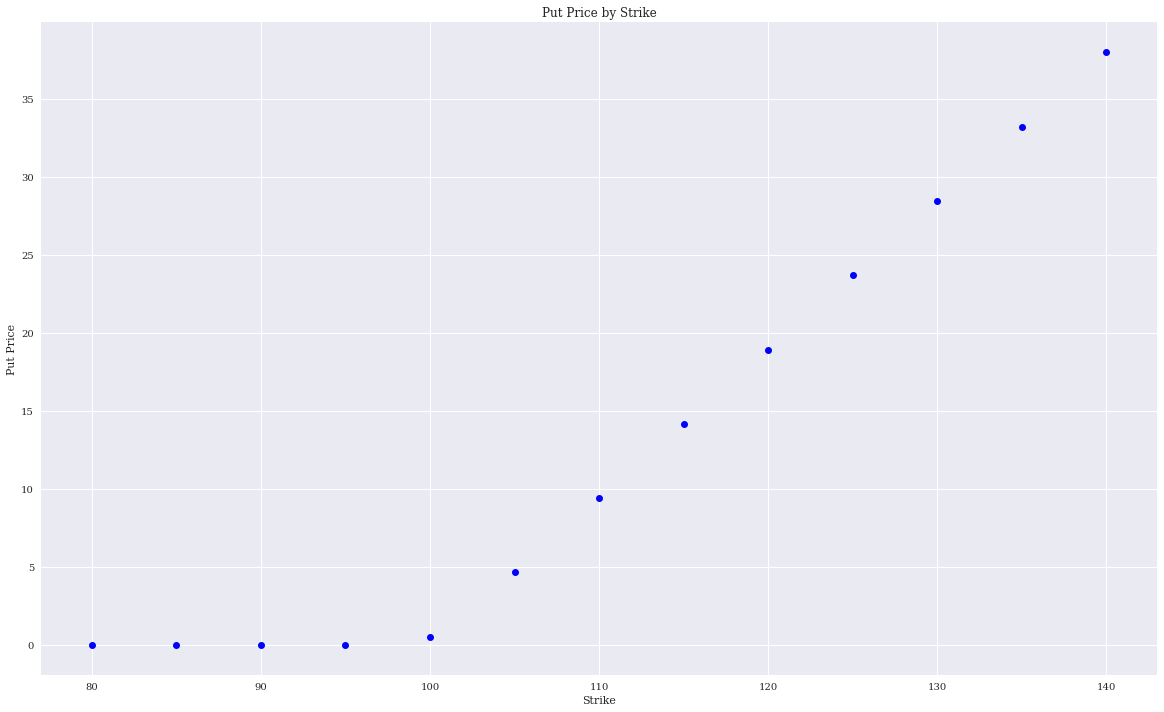

In [91]:
plt.figure(figsize=(20,12))
plt.plot(strike_list, put_surface, 'bo')
plt.title('Put Price by Strike')
plt.ylabel('Put Price')
plt.xlabel('Strike')

In [88]:
strike_list = np.arange(80., 140.1, 5.)
call_surface = generate_european_price_surface(strike_list, 'call')
call_surface = np.array(call_surface)
call_surface

array([1.9137e+01, 1.4377e+01, 9.6012e+00, 4.8369e+00, 5.7992e-01,
       1.7896e-05, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00])

Text(0.5, 0, 'Strike')

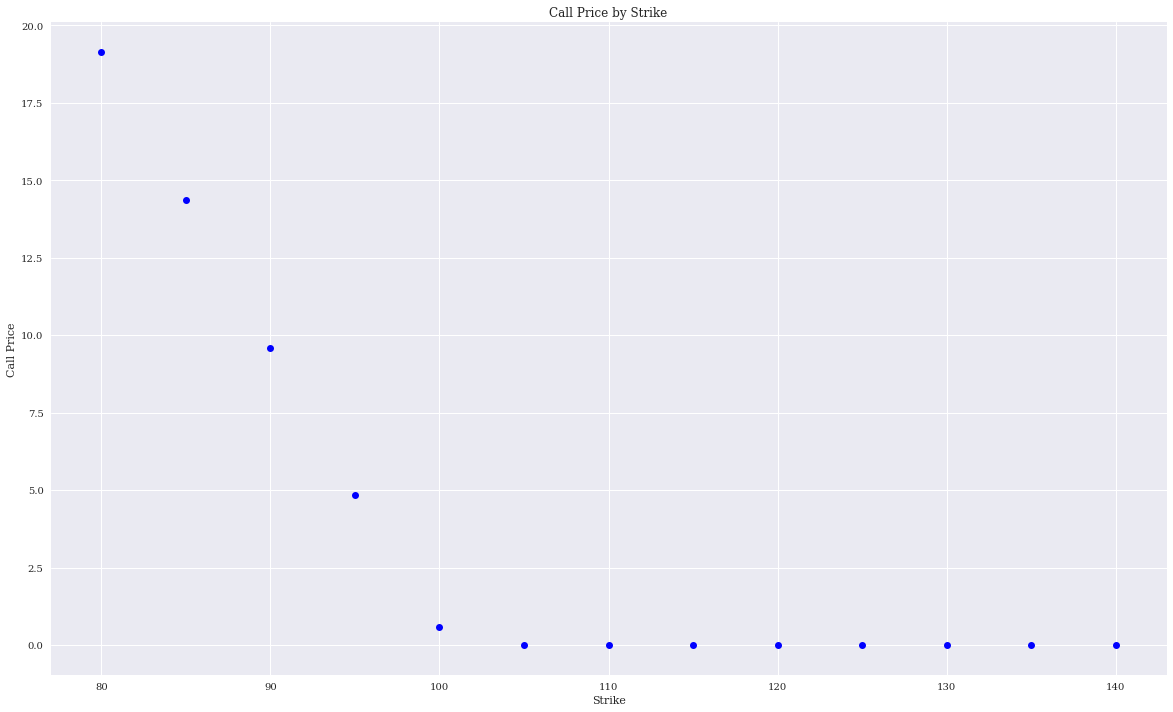

In [90]:
plt.figure(figsize=(20,12))
plt.plot(strike_list, call_surface, 'bo')
plt.title('Call Price by Strike')
plt.ylabel('Call Price')
plt.xlabel('Strike')

# Valuation - American Options
* Because American Options can be exercised at any time, this become an **optimal stopping problem**
* As usual, we set up a discretized grid and a stochastic process.
* The optimal stopping formula becomes ${V_{0} = \sup_{\tau \in \{\}}}$